<a href="https://colab.research.google.com/github/Shreyashgupta016/My-Projects/blob/main/Yulu_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem statement says that Yulu, which is India’s leading micro-mobility service provider, has seen a drop in its revenue recently. Yulu wants to understand the variables that are significant in predicting the demands of shared electric bikes in Indian market, and the effect of those variables in the total demand of shared electric bikes. To find out, we will run the hypothesis test on each sample category with respect to the total counts of electric bikes rented for that sample.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, kruskal, chi2_contingency
from scipy.stats import shapiro, levene
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Performing Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include='datetime')

<ipython-input-209-41adad5e0539>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime')


,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1
first,2011-01-01 00:00:00
last,2012-12-19 23:00:00


This data contains 10886 entries for different time through the span of 2 years. The data is processed across 12 attributes of categorical and continuous data.

In [ ]:
# Converting categorical variables to category to make it more understandable
def seasons(x):
  if x==1:
    return 'spring'
  elif x==2:
    return 'summer'
  elif x==3:
    return 'fall'
  elif x==4:
    return 'winter'
df['season']=df['season'].apply(seasons)


def isholiday(x):
  if x==1:
    return 'Yes'
  elif x==0:
    return 'No'
df['holiday']=df['holiday'].apply(isholiday)


def isworkingday(x):
  if x==1:
    return 'Yes'
  elif x==0:
    return 'No'
df['workingday']=df['workingday'].apply(isworkingday)


def weathercondition(x):
  if x==1:
    return 'Clear'
  elif x==2:
    return 'Misty'
  elif x==3:
    return 'Light rain'
  elif x==4:
    return 'Bad'
df['weather']=df['weather'].apply(weathercondition)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Checking the value counts of each categorical variable
print(df['season'].value_counts())
print('-'*25)
print(df['holiday'].value_counts())
print('-'*25)
print(df['workingday'].value_counts())
print('-'*25)
print(df['weather'].value_counts())

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64
-------------------------
No     10575
Yes      311
Name: holiday, dtype: int64
-------------------------
Yes    7412
No     3474
Name: workingday, dtype: int64
-------------------------
Clear         7192
Misty         2834
Light rain     859
Bad              1
Name: weather, dtype: int64


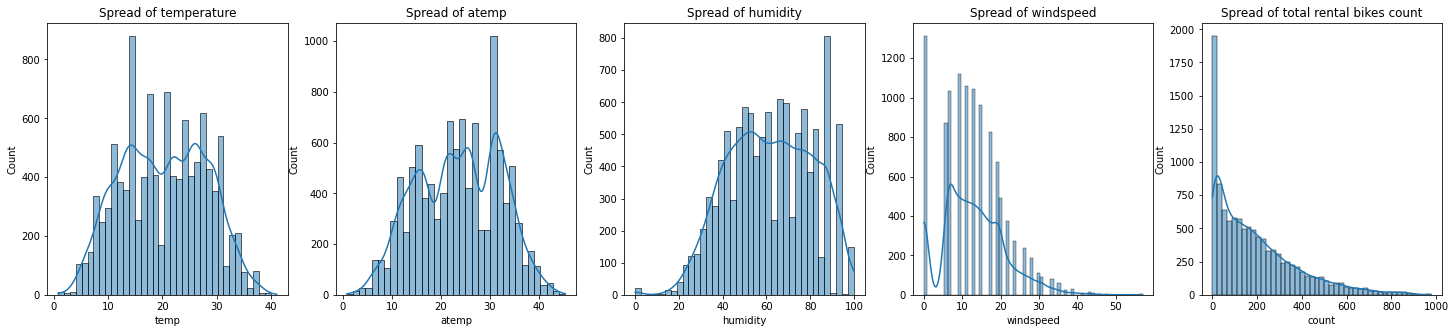

In [ ]:
# Histplot to understand the numerical variables
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
sns.histplot(df['temp'], kde=True)
plt.title('Spread of temperature')

plt.subplot(1,5,2)
sns.histplot(df['atemp'], kde=True)
plt.title('Spread of atemp')

plt.subplot(1,5,3)
sns.histplot(df['humidity'], kde=True)
plt.title('Spread of humidity')

plt.subplot(1,5,4)
sns.histplot(df['windspeed'], kde=True)
plt.title('Spread of windspeed')

plt.subplot(1,5,5)
sns.histplot(df['count'], kde=True)
plt.title('Spread of total rental bikes count')

plt.show()

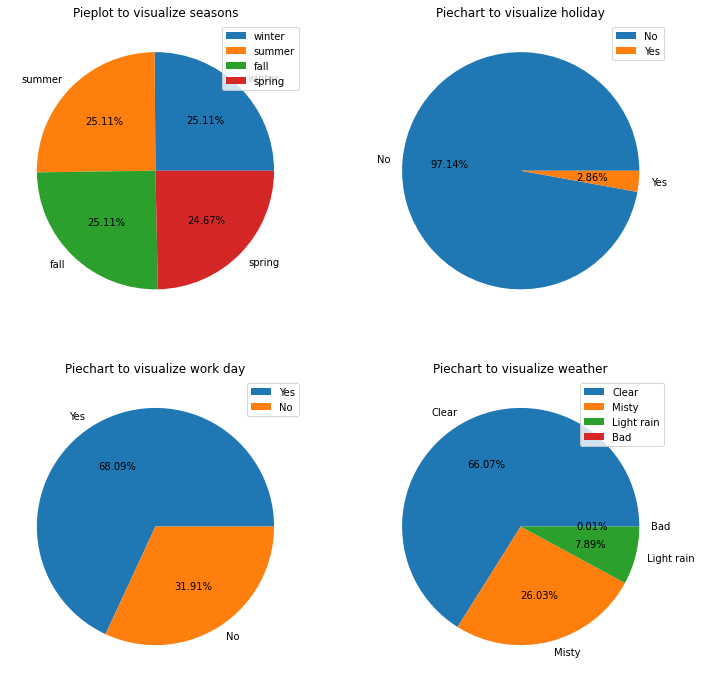

In [ ]:
# Pieplot to understand the categorical variables
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.pie(df['season'].value_counts(), 
        labels=df['season'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.title('Pieplot to visualize seasons')

plt.subplot(2,2,2)
plt.pie(df['holiday'].value_counts(), 
        labels=df['holiday'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.title('Piechart to visualize holiday')

plt.subplot(2,2,3)
plt.pie(df['workingday'].value_counts(), 
        labels=df['workingday'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.title('Piechart to visualize work day')

plt.subplot(2,2,4)
plt.pie(df['weather'].value_counts(), 
        labels=df['weather'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.title('Piechart to visualize weather')

plt.show()

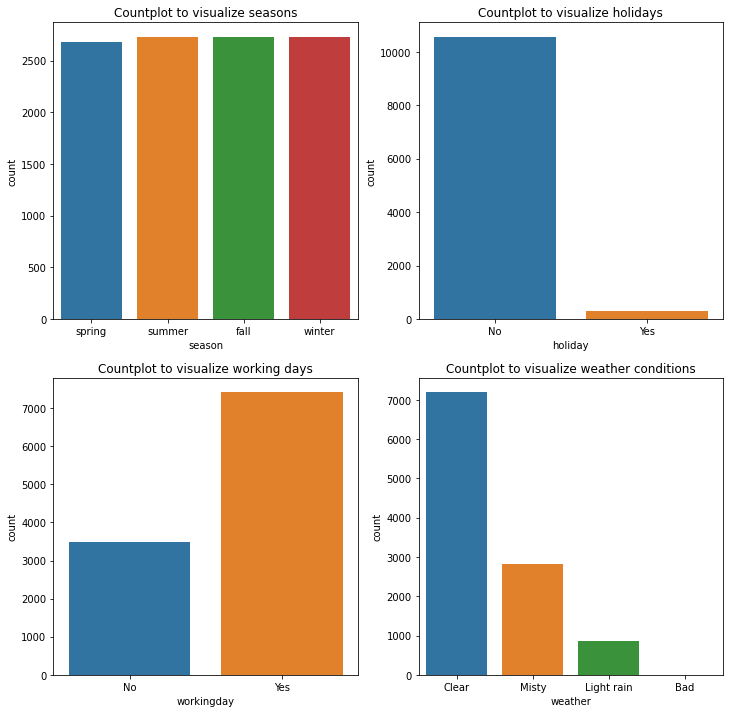

In [ ]:
# Countplot to understand the categorical variables
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(x=df['season'])
plt.title('Countplot to visualize seasons')

plt.subplot(2,2,2)
sns.countplot(x=df['holiday'])
plt.title('Countplot to visualize holidays')

plt.subplot(2,2,3)
sns.countplot(x=df['workingday'])
plt.title('Countplot to visualize working days')

plt.subplot(2,2,4)
sns.countplot(x=df['weather'])
plt.title('Countplot to visualize weather conditions')

plt.show()

From the preliminary data analysis, we found out that the bikes rented in different seasons are very different. From the graphs, we can clearly see that the bikes rented in fall are the maximum, while the bikes rented in spring are the least. Similarly, the bikes rented in clear weather are the most, while the bikes rented in all other weather conditions are less.

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


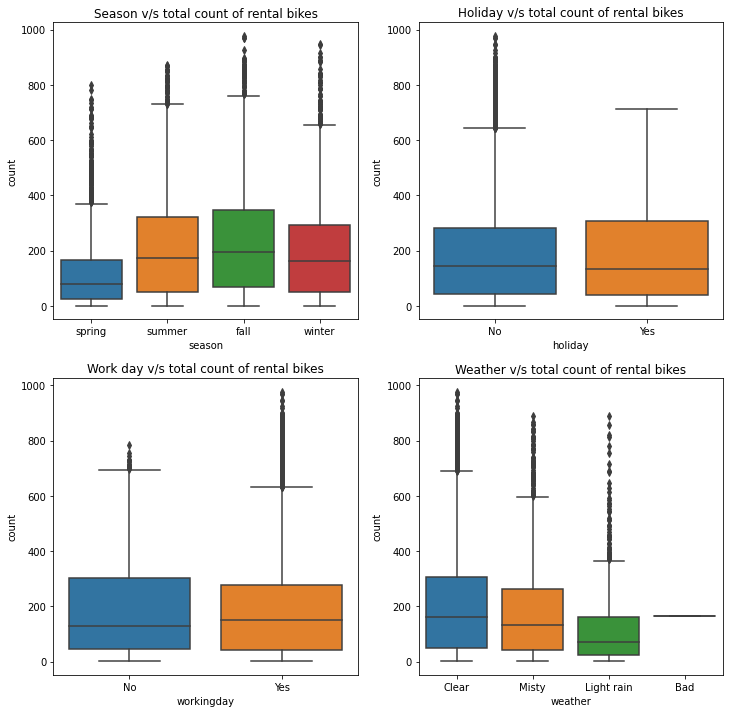

In [ ]:
# Boxplot to understand the relation between categorical variables and the total number of rental bikes  
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='season', y='count')
plt.title('Season v/s total count of rental bikes')

plt.subplot(2,2,2)
sns.boxplot(data=df, x='holiday', y='count')
plt.title('Holiday v/s total count of rental bikes')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='workingday', y='count')
plt.title('Work day v/s total count of rental bikes')

plt.subplot(2,2,4)
sns.boxplot(data=df, x='weather', y='count')
plt.title('Weather v/s total count of rental bikes')

plt.show()

There are significant outliers in the categorical data. These outliers can be seen in the samples that have more data. For example, there are 311 occurrences of holidays. With this small data we see, that there are no outliers, while on 10575 working days there are numerous outliers. Similarly in the non working days, we can less outliers when compared to working days. There are no null or missing values in the dataset.

In [ ]:
# Relation between dependent and independent variables
k1=df.groupby('season')[['count']].agg(sum)
print(k1)
print('-'*25)
k1.reset_index(inplace=True)
k2=df.groupby('holiday')[['count']].agg(sum)
print(k2)
print('-'*25)
k2.reset_index(inplace=True)
k3=df.groupby('workingday')[['count']].agg(sum)
print(k3)
print('-'*25)
k3.reset_index(inplace=True)
k4=df.groupby('weather')[['count']].agg(sum)
print(k4)
k4.reset_index(inplace=True)

         count
season        
fall    640662
spring  312498
summer  588282
winter  544034
-------------------------
           count
holiday         
No       2027668
Yes        57808
-------------------------
              count
workingday         
No           654872
Yes         1430604
-------------------------
              count
weather            
Bad             164
Clear       1476063
Light rain   102089
Misty        507160


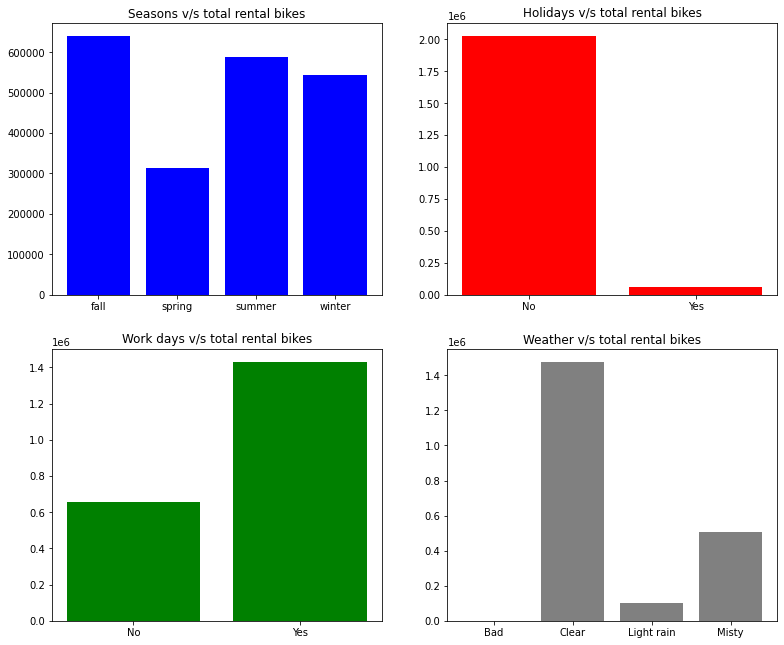

In [ ]:
# Barplot to visualize the categorical variables and the total count of rental bikes in each category
plt.figure(figsize=(13,11))
plt.subplot(2,2,1)
plt.bar(k1['season'],k1['count'], color='blue')
plt.title('Seasons v/s total rental bikes')

plt.subplot(2,2,2)
plt.bar(k2['holiday'],k2['count'], color='red')
plt.title('Holidays v/s total rental bikes')

plt.subplot(2,2,3)
plt.bar(k3['workingday'],k3['count'], color='green')
plt.title('Work days v/s total rental bikes')

plt.subplot(2,2,4)
plt.bar(k4['weather'],k4['count'], color='grey')
plt.title('Weather v/s total rental bikes')

plt.show()

Hypothesis testing with significance level = 0.05 at 95% confidence interval

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Does working day has an effect on number of bikes rented?
# To find out, we'll perform a 2 sample ttest and see whether the count of total rented bikes is statistically significant wrt working and non-working days.

# H0 (Null hypothesis): Working and non-working days has no effect on the total number of bikes rented (mu1 = mu2)
# Ha (Alternate hypothesis): Working days sees more number of bikes rented than non-working days (mu1 > mu2) ----> Right-tailed

work_day = df.loc[df['workingday']=='Yes']['count']
no_work_day = df.loc[df['workingday']=='No']['count']

t_stat, p_value = ttest_ind(work_day, no_work_day, equal_var=False, alternative='greater')
print('Test statistic:', t_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means working days sees more number of bikes rented than non-working days')
else:
  print('Fail to reject H0, which means that working and non-working days has no effect on the total number of bikes rented')

Test statistic: 1.2362580418223226
p value: 0.10820156140347549
Fail to reject H0, which means that working and non-working days has no effect on the total number of bikes rented


In [ ]:
# Does holiday has an effect on number of bikes rented?
# To find out, we'll perform a 2 sample ttest and see whether the count of total rented bikes is statistically significant wrt holidays and working days.

# H0 (Null hypothesis): Holidays and working days has no effect on the total number of bikes rented (mu1 = mu2)
# Ha (Alternate hypothesis): Holidays sees less number of bikes rented than working days (mu1 < mu2) ----> Left-tailed

holiday = df.loc[df['holiday']=='Yes']['count']
no_holiday = df.loc[df['holiday']=='No']['count']

t_stat, p_value = ttest_ind(holiday, no_holiday, alternative='less')
print('Test statistic:', t_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means holidays sees less number of bikes rented than working days')
else:
  print('Fail to reject H0, which means that holidays and working days has no effect on the total number of bikes rented')

Test statistic: -0.5626388963477119
p value: 0.28684619416355517
Fail to reject H0, which means that holidays and working days has no effect on the total number of bikes rented


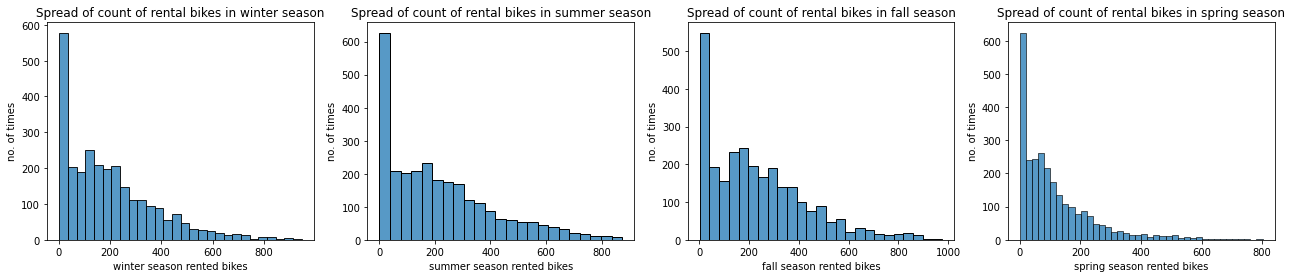



Clearly the data from each season sample is not Gaussian, which is one of the assumptions in ANOVA test.


In [ ]:
# Histplot to check the distribution of the data for each season

winter = df.loc[df['season']=='winter']['count']
summer = df.loc[df['season']=='summer']['count']
fall = df.loc[df['season']=='fall']['count']
spring = df.loc[df['season']=='spring']['count']

plt.figure(figsize=(22,4))
plt.subplot(1,4,1)
sns.histplot(winter)
plt.xlabel('winter season rented bikes')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in winter season')

plt.subplot(1,4,2)
sns.histplot(summer)
plt.xlabel('summer season rented bikes')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in summer season')

plt.subplot(1,4,3)
sns.histplot(fall)
plt.xlabel('fall season rented bikes')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in fall season')

plt.subplot(1,4,4)
sns.histplot(spring)
plt.xlabel('spring season rented bikes')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in spring season')

plt.show()
print('\n')
print('Clearly the data from each season sample is not Gaussian, which is one of the assumptions in ANOVA test.')

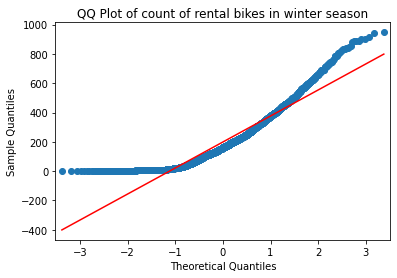



p value after running shapiro test on winter sample data: 7.66795125173303e-08
Winter data is not Gaussian


In [ ]:
# We can further check the normality of the data using QQ Plot, and Shapiro test for each season on 150 sample data

qqplot(winter, line='s')
plt.title('QQ Plot of count of rental bikes in winter season')
plt.show()
print('\n')

# For Shapiro test, H0 (Null hypothesis): Data is Gaussian
# Ha (Alternate hypothesis): Data is not Gaussian

winter_sample=winter.sample(150)
test_stat, p_value = shapiro(winter_sample)
print('p value after running shapiro test on winter sample data:', p_value)
if p_value<0.05:
  print('Winter data is not Gaussian')
else:
  print('Winter data is Gaussian')

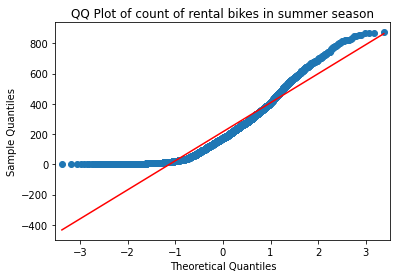



p value after running shapiro test on summer sample data: 1.2775645075180364e-07
Summer data is not Gaussian


In [ ]:
qqplot(summer, line='s')
plt.title('QQ Plot of count of rental bikes in summer season')
plt.show()
print('\n')

summer_sample=summer.sample(150)
test_stat, p_value = shapiro(summer_sample)
print('p value after running shapiro test on summer sample data:', p_value)
if p_value<0.05:
  print('Summer data is not Gaussian')
else:
  print('Summer data is Gaussian')

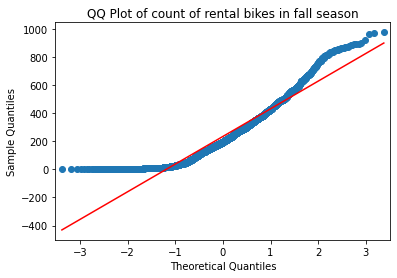



p value after running shapiro test on fall sample data: 7.515192912421753e-09
Fall data is not Gaussian


In [ ]:
qqplot(fall, line='s')
plt.title('QQ Plot of count of rental bikes in fall season')
plt.show()
print('\n')

fall_sample=fall.sample(150)
test_stat, p_value = shapiro(fall_sample)
print('p value after running shapiro test on fall sample data:', p_value)
if p_value<0.05:
  print('Fall data is not Gaussian')
else:
  print('Fall data is Gaussian')

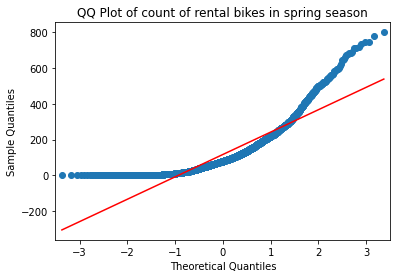



p value after running shapiro test on spring sample data: 4.1133887745611886e-13
Spring data is not Gaussian


In [ ]:
qqplot(spring, line='s')
plt.title('QQ Plot of count of rental bikes in spring season')
plt.show()
print('\n')

spring_sample=spring.sample(150)
test_stat, p_value = shapiro(spring_sample)
print('p value after running shapiro test on spring sample data:', p_value)
if p_value<0.05:
  print('Spring data is not Gaussian')
else:
  print('Spring data is Gaussian')

In [ ]:
# We check the statistical significance of the variances of the 4 sets of seasons data using levene test, as having equal variance is also one of the assumptions of ANOVA

# H0 (Null hypothesis): Variances are equal
# Ha (Alternate hypothesis): Variances are different

test_stat, p_value = levene(winter,summer,fall,spring)
print('p value after levene test on seasons data set:', p_value)
if p_value<0.05:
  print('Variances are different')
else:
  print('Variances are same')

p value after levene test on seasons data set: 1.0147116860043298e-118
Variances are different


In [ ]:
# Does different seasons has an effect on number of bikes rented?
# To find out, we'll perform an ANOVA and see whether the count of total rented bikes is statistically significant wrt different seasons.

# H0 (Null hypothesis): Seasons have no effect on the total number of bikes rented
# Ha (Alternate hypothesis): At least one season has an effect on total number of bikes rented

f_stat, p_value = f_oneway(winter, summer, fall, spring)
print('Test statistic:', f_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that at least one season has an effect on total number of bikes rented')
else:
  print('Fail to reject H0, which means that seasons have no effect on the total number of bikes rented')

Test statistic: 236.94671081032104
p value: 6.164843386499654e-149
Reject H0, which means that at least one season has an effect on total number of bikes rented


In [ ]:
# Kruskal-Wallis test on seasons data

# H0 (Null hypothesis): Seasons have no effect on the total number of bikes rented
# Ha (Alternate hypothesis): At least one season has an effect on total number of bikes rented

k_stat, p_value = kruskal(winter, summer, fall, spring)
print('Test statistic:', k_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that at least one season has an effect on total number of bikes rented as per Kruskal-Wallis test')
else:
  print('Fail to reject H0, which means that seasons have no effect on the total number of bikes rented as per Kruskal-Wallis test')

Test statistic: 699.6668548181915
p value: 2.4790083726176776e-151
Reject H0, which means that at least one season has an effect on total number of bikes rented as per Kruskal-Wallis test


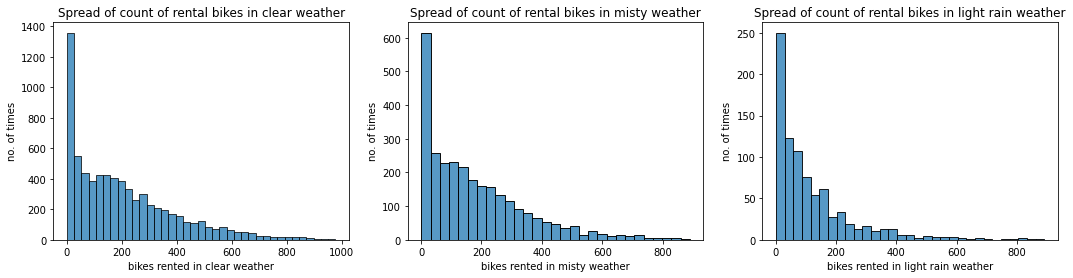



Clearly the data from each weather condition sample is not Gaussian, which is one of the assumptions in ANOVA test.


In [ ]:
# Histplot to check the distribution of the data for each weather condition

clear = df.loc[df['weather']=='Clear']['count']
misty = df.loc[df['weather']=='Misty']['count']
light_rain = df.loc[df['weather']=='Light rain']['count']
bad = df.loc[df['weather']=='Bad']['count']

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.histplot(clear)
plt.xlabel('bikes rented in clear weather')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in clear weather')

plt.subplot(1,3,2)
sns.histplot(misty)
plt.xlabel('bikes rented in misty weather')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in misty weather')

plt.subplot(1,3,3)
sns.histplot(light_rain)
plt.xlabel('bikes rented in light rain weather')
plt.ylabel('no. of times')
plt.title('Spread of count of rental bikes in light rain weather')

plt.show()
print('\n')
print('Clearly the data from each weather condition sample is not Gaussian, which is one of the assumptions in ANOVA test.')

In [ ]:
# Does different weather conditions has an effect on number of bikes rented?
# To find out, we'll perform an ANOVA and see whether the count of total rented bikes is statistically significant wrt different weather conditions.

# H0 (Null hypothesis): Different weather conditions have no effect on the total number of bikes rented
# Ha (Alternate hypothesis): At least one weather condition has an effect on total number of bikes rented

f_stat, p_value = f_oneway(clear, misty, light_rain)
print('Test statistic:', f_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that at least one weather condition has an effect on total number of bikes rented')
else:
  print('Fail to reject H0, which means that different weather conditions have no effect on the total number of bikes rented')

Test statistic: 98.28356881946706
p value: 4.976448509904196e-43
Reject H0, which means that at least one weather condition has an effect on total number of bikes rented


In [ ]:
# Kruskal-Wallis test on weather conditions data

# H0 (Null hypothesis): Different weather conditions have no effect on the total number of bikes rented
# Ha (Alternate hypothesis): At least one weather condition has an effect on total number of bikes rented

k_stat, p_value = kruskal(clear, misty, light_rain, bad)
print('Test statistic:', k_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that at least one weather condition has an effect on total number of bikes rented as per Kruskal-Wallis test')
else:
  print('Fail to reject H0, which means that different weather conditions have no effect on the total number of bikes rented as per Kruskal-Wallis test')

Test statistic: 205.00216514479087
p value: 3.501611300708679e-44
Reject H0, which means that at least one weather condition has an effect on total number of bikes rented as per Kruskal-Wallis test


In [ ]:
# Are different weather conditions related/dependent on different seasons?
# To find out, we'll perform a chi-squared test.
print(pd.crosstab(df['weather'], df['season']))
print('\n')

# H0 (Null hypothesis): Weather conditions and seasons are independent
# Ha (Alternate hypothesis): Weather conditions and seasons are dependent on each other

chi_stat, p_value, dof, exp = chi2_contingency(pd.crosstab(df['weather'], df['season']))
print('Chi-square statistic:', chi_stat)
print('p value:', p_value)
if p_value < 0.05:
  print('Reject H0, which means that weather conditions and seasons are dependent on each other')
else:
  print('Fail to reject H0, which means that weather conditions and seasons are independent')

season      fall  spring  summer  winter
weather                                 
Bad            0       1       0       0
Clear       1930    1759    1801    1702
Light rain   199     211     224     225
Misty        604     715     708     807


Chi-square statistic: 49.15865559689363
p value: 1.5499250736864862e-07
Reject H0, which means that weather conditions and seasons are dependent on each other


We’ve run a 2 sample ttest on the working day and holiday sample data wrt the total count of electric bikes rented to find the statistical significance of bikes rented in these two types of days. We’ve also run an ANOVA and Kruskal-Wallis test for the seasons and weather data to find if any season or weather conditions determines the sale of bikes. The data of these two categories fails the ANOVA assumptions as the data is not Gaussian, as seen through the QQ Plot and Shapiro test, therefore we ran a Kruskal-Wallis test to test the significance.  The levene test determined that the variances are indeed different of the 4 sample data. Finally, we ran the chi-squared test between the categorical variables season and weather to check if these two variables are dependent on each other. In all the cases, we’ve measured the significance against 0.05 significance level, thereby having a 95% confidence interval.

Correlation

In [ ]:
# Correlation between different continuous variables
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


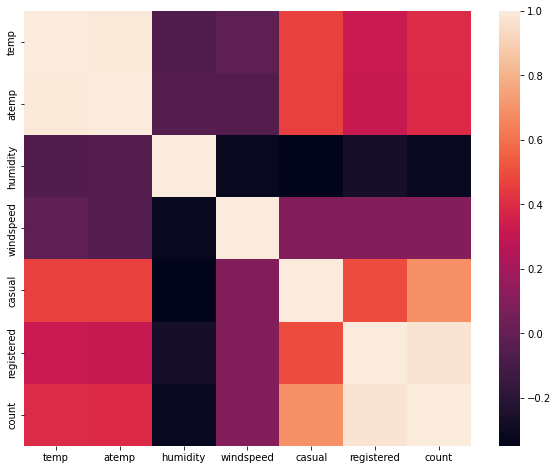

In [ ]:
# Heatmap to visualize the correlation between the continuous data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

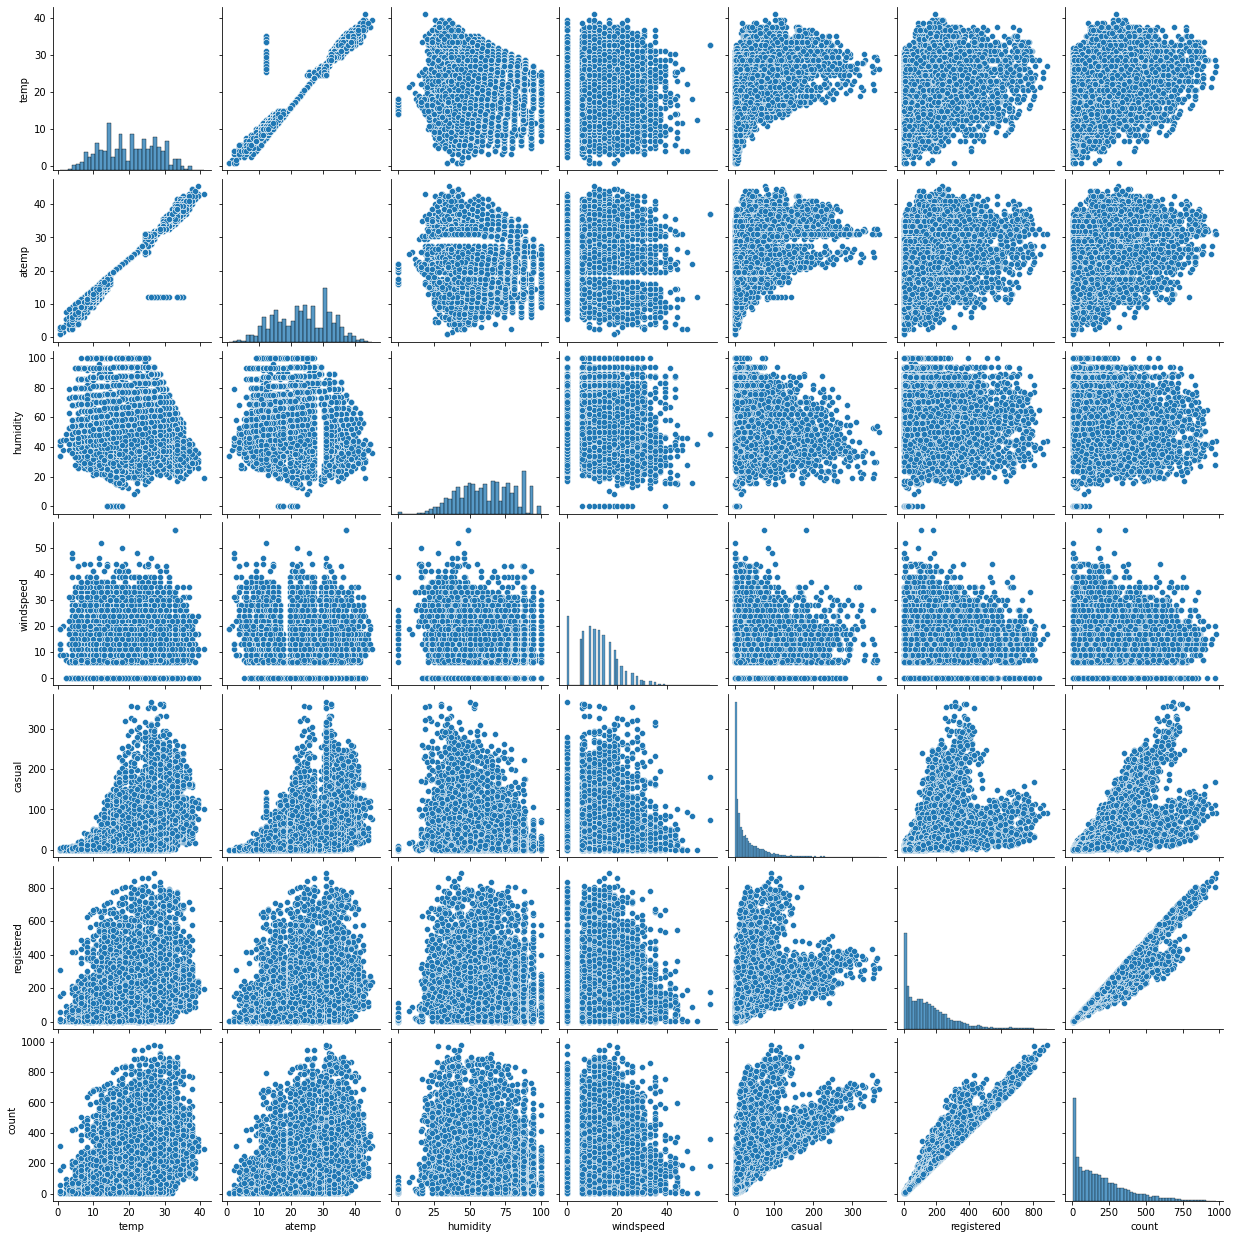

In [ ]:
sns.pairplot(data=df)
plt.show()

 There is a positive correlation between the temperature and the total number of bikes rented, but there is a negative correlation between the humidity and total number of bikes rented. The most number of bikes are rented when the temperature felt is in the range of 20 to 35 degrees Celsius, and the humidity of the region is in between 30 to 60 units. The count of casual and registered vehicles is directly proportional to the total count of bikes rented.


**Insights:**

	1.	The fall season (September to November) saw the most number of bikes rented i.e. 640662, whereas spring season (March to May) saw the least number of bikes rented i.e. 312498. 
	2.	Almost 70% of bikes were rented in the clear weather, while the number of bikes rented in other weather conditions were just 30% of the total.
	3.	The average number of bikes rented in holidays and working are almost equal. Working and non-working days also had the similar case.
	4.	The working and non-working days has no effect on the number of bikes rented. The p value is 0.11 which is slightly more than the threshold.
	5.	Holidays also have no effect on the number of bikes rented. The p value is 0.29.
	6.	The data of all the seasons and weather conditions is not Gaussian and therefore running ANOVA on this sample data will give faulty results.
	7.	Seasons does have an effect on the total number of bikes rented. The sale of bikes in different seasons is different and is highly influenced by the type of season, as we conclude that with the relatively very low p value.
	8.	Weather conditions also have a very high effect on the number of bikes rented. The sale of bikes in clear weather is very large and therefore number of bikes rented in different weather conditions is statically significant.
	9.	There is also a very good relation between the weather conditions and different seasons. The weather conditions are dependent on the seasons as we saw through the chi-squared test. The p_value is 10^-7.
	10.	There is a positive correlation between the temperature, temperature felt with the total number of bikes rented. This means that temperature also somewhat influences the sale of bikes.
	11.	There is a negative correlation between the humidity and the count, which means that high humid conditions mostly see decrease in sale of bikes.

**Recommendations:**

	1.	As the holidays and working days have no effect on the number of bikes rented, we can fairly say that Yulu should not consider this as an important parameter to increase its revenue. This is mostly because the traffic congestion on the road doesn’t decrease significantly. People usually travel on holidays for their personal work and for shopping. This is also the case for public holidays.
	2.	 The seasons have a very profound effect on the sales of electric rental bikes for daily commute. This is because the spring season which sees the beginning of the new financial year is usually gated with less traffic, and people tend to rest. While the fall season experiences a very traffic flow due to work deadlines. Yulu can focus on having more number of bike stations during the fall season, as this will see more number of people using Yulu bikes.
	3.	The weather conditions greatly influence the sale of bikes. The clear weather is when most of the Yulu bikes are rented. Yulu can focus on activating more bike stations during clear weather. This will help in increasing the revenue of Yulu while during the other weather conditions especially during light and heavy rain in the month of July and August, Yulu can save its money by having less bike stations in the city,as people don’t tend to travel during such weather conditions.
	4.	The weather conditions and seasons are also very heavily dependent on each other. Mostly fall is the time when we see clear weather while light-rain, haze and misty weather is seen during spring and winter season. This is the time when the sale of bikes are usually less when compared to the other time of the year. Yulu can station more bikes when there is a prediction of clear weather in the fall season.
	5.	Yulu can also station more bikes when the temperature is optimum, that is in the rage of 20-35 degrees Celsius as this is the time when it sees good sales, and can decrease the number of bike stations when the humidity is more, as humidity is negatively correlated with the total number of bikes rented and the temperature.